In [35]:
import tensorflow as tf
from keras import datasets, layers, models, losses, optimizers
import matplotlib.pyplot as plt
import numpy as np

In [36]:
# Enable Metal GPU acceleration for Mac M1
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [37]:
# Load and prepare the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.4119 - loss: 1.8755 - val_accuracy: 0.6169 - val_loss: 1.0927
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.6449 - loss: 1.0055 - val_accuracy: 0.6993 - val_loss: 0.8539
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.6950 - loss: 0.8667 - val_accuracy: 0.7067 - val_loss: 0.8379
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.7260 - loss: 0.7803 - val_accuracy: 0.7563 - val_loss: 0.6941
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.7517 - loss: 0.7113 - val_accuracy: 0.7511 - val_loss: 0.7263
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.7753 - loss: 0.6465 - val_accuracy: 0.7842 - val_loss: 0.6331
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.7927 - loss: 0.5959 - val_accuracy: 0.7820 - val_loss: 0.6405
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.8072 -

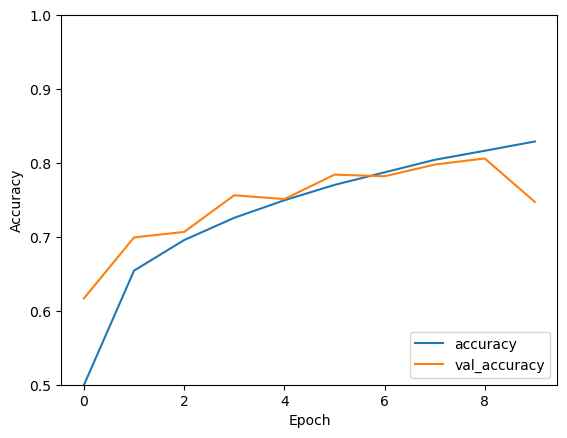

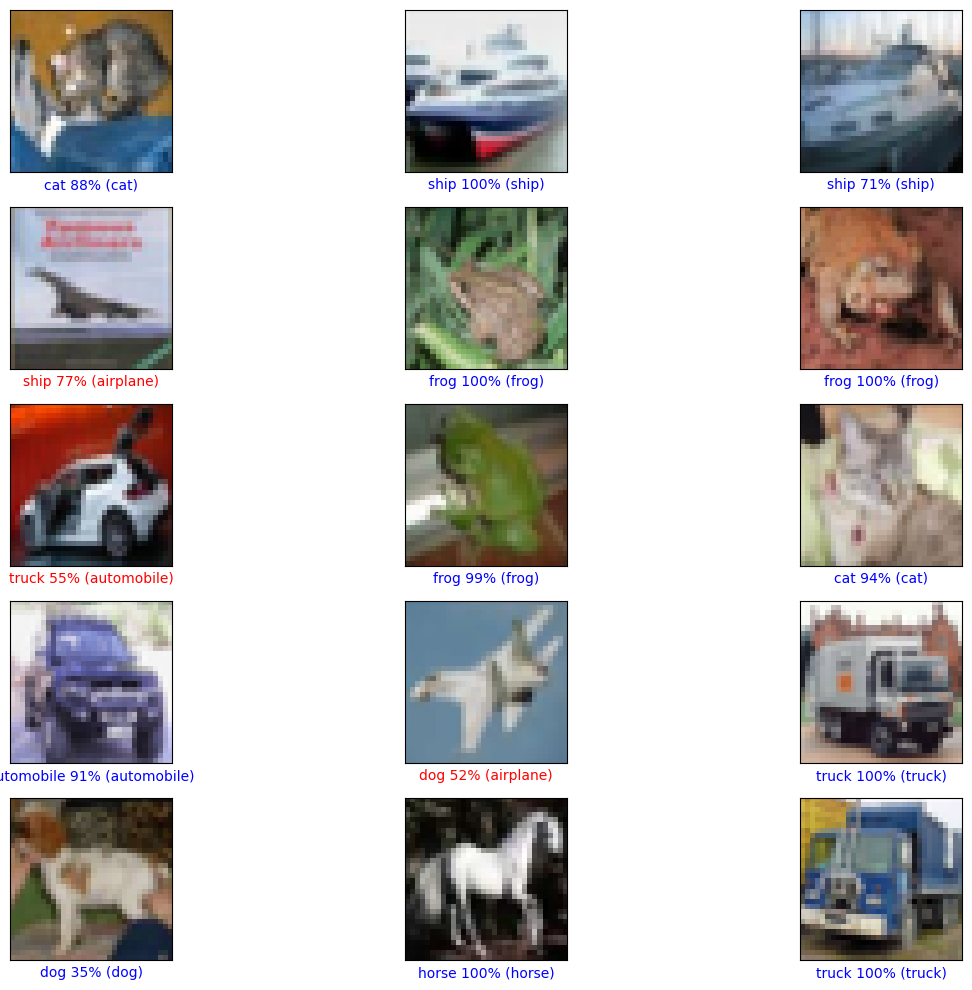

In [38]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Create the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss=losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Make predictions
predictions = model.predict(test_images)
predictions = tf.nn.softmax(predictions)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Function to plot images with their predictions
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i][0], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% "
               f"({class_names[true_label]})", color=color)

# Plot the first X test images, their predicted labels, and the true labels
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
plt.tight_layout()
plt.show()


In [39]:
""" 
1. Сверточные нейронные сети (CNN) - это специализированные нейронные сети для обработки визуальной информации. Они используются для компьютерного зрения, распознавания образов и анализа изображений.

2. Основные компоненты CNN:
- Сверточные слои (Conv layers) - извлекают признаки изображений через операцию свертки
- Слои подвыборки (Pooling layers) - уменьшают размерность данных
- Полносвязные слои - выполняют финальную классификацию

3. Операция свертки работает через применение фильтров (ядер) небольшого размера, которые скользят по изображению и выделяют различные признаки - от простых линий и границ до сложных форм[6]. Фильтр размером обычно 3×3 или 5×5 применяется последовательно к участкам изображения.

4. Слои подвыборки (пулинга):
- Уменьшают пространственные размеры в 2 раза
- Сохраняют важные признаки
- Уменьшают вычислительную сложность
- Делают сеть устойчивой к небольшим изменениям входных данных

5. Полносвязные слои:
- Соединяют все нейроны предыдущего слоя со всеми нейронами следующего
- Выполняют финальную классификацию на основе выделенных признаков
- Моделируют сложные нелинейные функции для классификации

6. Примеры применения CNN:
- Распознавание лиц и объектов
- Автопилотирование транспортных средств
- Медицинская диагностика (анализ снимков)
- Системы видеонаблюдения
- Обработка естественного языка
"""

SyntaxError: invalid syntax (4105873897.py, line 1)